# Cancer Prediction Using Different Machine Learning Algorithm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

### Load The Dataset

In [2]:
df=pd.read_csv("The_Cancer_data_1500_V2.csv")
df.sample(5)

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
1296,45,1,29.428065,0,1,5.125762,0.095217,1,1
538,61,0,17.636842,0,1,4.707010,4.753032,0,0
17,59,0,25.593456,0,1,7.939551,4.470498,0,0
147,47,0,16.704308,0,1,1.558515,3.390613,0,0
559,66,1,37.653581,0,0,5.368591,2.474142,0,0


### Perform EDA

In [3]:
df.drop(["Age","Gender"],axis=1,inplace=True)
df.head()

,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,16.085313,0,1,8.146251,4.148219,1,1
1,30.828784,0,1,9.361630,3.519683,0,0
2,38.785084,0,2,5.135179,4.728368,0,1
3,30.040296,0,0,9.502792,2.044636,0,0
4,35.479721,0,0,5.356890,3.309849,0,1


In [4]:
df.shape

(1500, 7)

In [5]:
df.isnull().sum()

BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BMI               1500 non-null   float64
 1   Smoking           1500 non-null   int64  
 2   GeneticRisk       1500 non-null   int64  
 3   PhysicalActivity  1500 non-null   float64
 4   AlcoholIntake     1500 non-null   float64
 5   CancerHistory     1500 non-null   int64  
 6   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 82.2 KB


In [7]:
df.describe()

,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


In [8]:
df["Diagnosis"].unique()

array([1, 0], dtype=int64)

### Graphical Representation

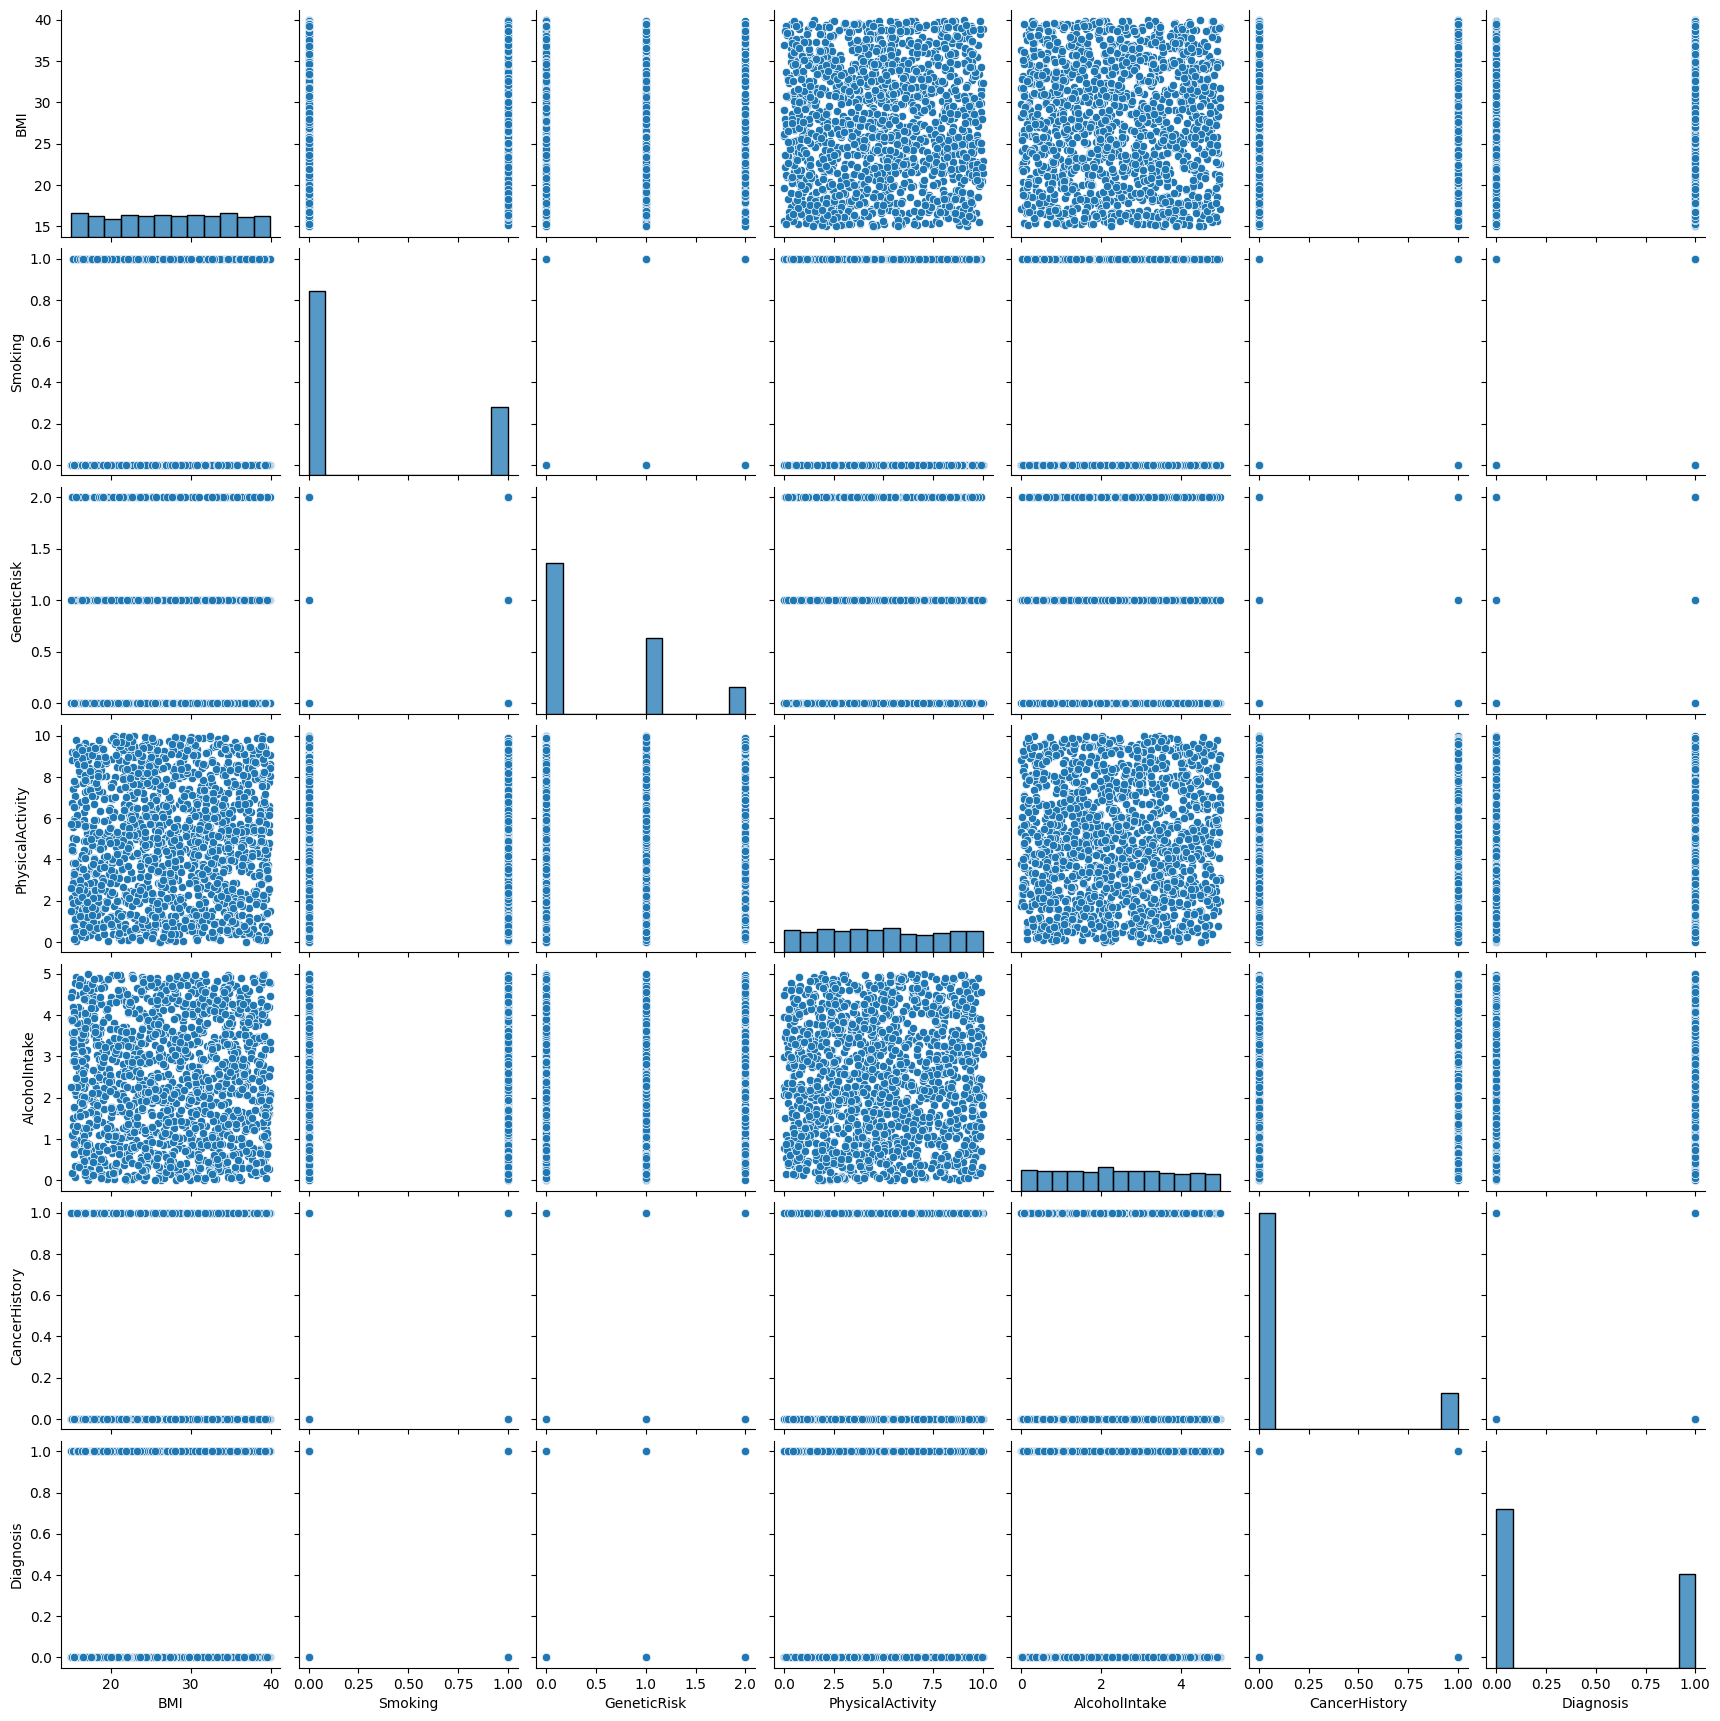

In [9]:
sns.pairplot(df)
plt.show()

### Seperate The Dataset Into Input And Output Features

In [10]:
x=df.drop("Diagnosis",axis=1)
y=df["Diagnosis"]

### Feature Scaling

In [11]:
mn=MinMaxScaler()

In [12]:
x=pd.DataFrame(mn.fit_transform(x),columns=x.columns)
x

,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory
0,0.043473,0.0,0.5,0.815020,0.831746,1.0
1,0.634195,0.0,0.5,0.936653,0.705684,0.0
2,0.952978,0.0,1.0,0.513678,0.948104,0.0
3,0.602603,0.0,0.0,0.950780,0.409840,0.0
4,0.820543,0.0,0.0,0.535866,0.663598,0.0
...,...,...,...,...,...,...
1495,0.404262,0.0,0.0,0.989748,0.257314,0.0
1496,0.739103,0.0,0.5,0.166719,0.457174,1.0
1497,0.705717,1.0,0.5,0.046480,0.029862,0.0
1498,0.423422,0.0,0.0,0.779899,0.398107,1.0


### Training And Testing Data

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [14]:
x_test.sample(7)

,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory
429,0.430361,0.0,0.0,0.116915,0.759368,1.0
306,0.920447,0.0,0.5,0.921249,0.496812,0.0
1447,0.866726,0.0,0.5,0.078158,0.516142,0.0
433,0.803970,0.0,0.0,0.482629,0.211360,0.0
274,0.616026,1.0,0.0,0.545935,0.412773,0.0
1001,0.066108,0.0,0.0,0.487222,0.095717,1.0
123,0.879426,0.0,0.5,0.626089,0.562700,1.0


## Logistic Regression

In [15]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [16]:
lg.score(x_test,y_test)

0.8186666666666667

In [17]:
y_test.at[1326]

1

In [18]:
lg.predict([[0.781655,0.0,0.0,0.120814,0.927022,1.0]])

C:\Users\USER\.conda\envs\py39_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

## Support Vector Machine (SVM)

In [19]:
sv=SVC(kernel="linear",probability=True)
sv.fit(x_train,y_train)

SVC(kernel='linear', probability=True)

In [20]:
sv.score(x_test,y_test)

0.816

In [21]:
y_test.at[701]

1

In [22]:
sv.predict([[0.115113,1.0,0.0,0.407972,0.799815,1.0]])

C:\Users\USER\.conda\envs\py39_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

## K-Nearest Neighbors

In [23]:
kn=KNeighborsClassifier(n_neighbors=10)
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [24]:
kn.score(x_test,y_test)

0.8213333333333334

In [25]:
y_test.at[128]

0

In [26]:
kn.predict([[0.081043,0.0,0.0,0.561792,0.751191,0.0]])

C:\Users\USER\.conda\envs\py39_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [27]:
for i in range(2,21):
    kp=KNeighborsClassifier(n_neighbors=i)
    kp.fit(x_train,y_train)
    print(f"iteration: {i},Test Score={kp.score(x_test,y_test)},Training Score={kp.score(x_train,y_train)}")

iteration: 2,Test Score=0.7733333333333333,Training Score=0.8728888888888889
iteration: 3,Test Score=0.7706666666666667,Training Score=0.8746666666666667
iteration: 4,Test Score=0.7866666666666666,Training Score=0.8471111111111111
iteration: 5,Test Score=0.8,Training Score=0.8657777777777778
iteration: 6,Test Score=0.8106666666666666,Training Score=0.8497777777777777
iteration: 7,Test Score=0.8026666666666666,Training Score=0.8533333333333334
iteration: 8,Test Score=0.8053333333333333,Training Score=0.8391111111111111
iteration: 9,Test Score=0.816,Training Score=0.8488888888888889
iteration: 10,Test Score=0.8213333333333334,Training Score=0.8417777777777777
iteration: 11,Test Score=0.8133333333333334,Training Score=0.8462222222222222
iteration: 12,Test Score=0.816,Training Score=0.8382222222222222
iteration: 13,Test Score=0.816,Training Score=0.8408888888888889
iteration: 14,Test Score=0.8106666666666666,Training Score=0.832
iteration: 15,Test Score=0.808,Training Score=0.8408888888888

## Decision Tree

In [28]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [29]:
dt.score(x_test,y_test)

0.8026666666666666

In [30]:
y_test.at[1401]

1

In [31]:
dt.predict([[0.934468,1.0,0.5,0.116123,0.578347,1.0]])

C:\Users\USER\.conda\envs\py39_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [32]:
for i in range(2,21):
    d=DecisionTreeClassifier(max_depth=i)
    d.fit(x_train,y_train)
    print(f"Iteration {i},Test Score: {d.score(x_test,y_test)},Training Score: {d.score(x_train,y_train)}")

Iteration 2,Test Score: 0.7813333333333333,Training Score: 0.7857777777777778
Iteration 3,Test Score: 0.7653333333333333,Training Score: 0.7884444444444444
Iteration 4,Test Score: 0.7786666666666666,Training Score: 0.8168888888888889
Iteration 5,Test Score: 0.8026666666666666,Training Score: 0.8488888888888889
Iteration 6,Test Score: 0.7893333333333333,Training Score: 0.8871111111111111
Iteration 7,Test Score: 0.792,Training Score: 0.9013333333333333
Iteration 8,Test Score: 0.7653333333333333,Training Score: 0.9226666666666666
Iteration 9,Test Score: 0.776,Training Score: 0.9377777777777778
Iteration 10,Test Score: 0.7653333333333333,Training Score: 0.9493333333333334
Iteration 11,Test Score: 0.7626666666666667,Training Score: 0.9591111111111111
Iteration 12,Test Score: 0.7573333333333333,Training Score: 0.9644444444444444
Iteration 13,Test Score: 0.768,Training Score: 0.9724444444444444
Iteration 14,Test Score: 0.7466666666666667,Training Score: 0.9733333333333334
Iteration 15,Test Sc

In [33]:
from sklearn.tree import plot_tree

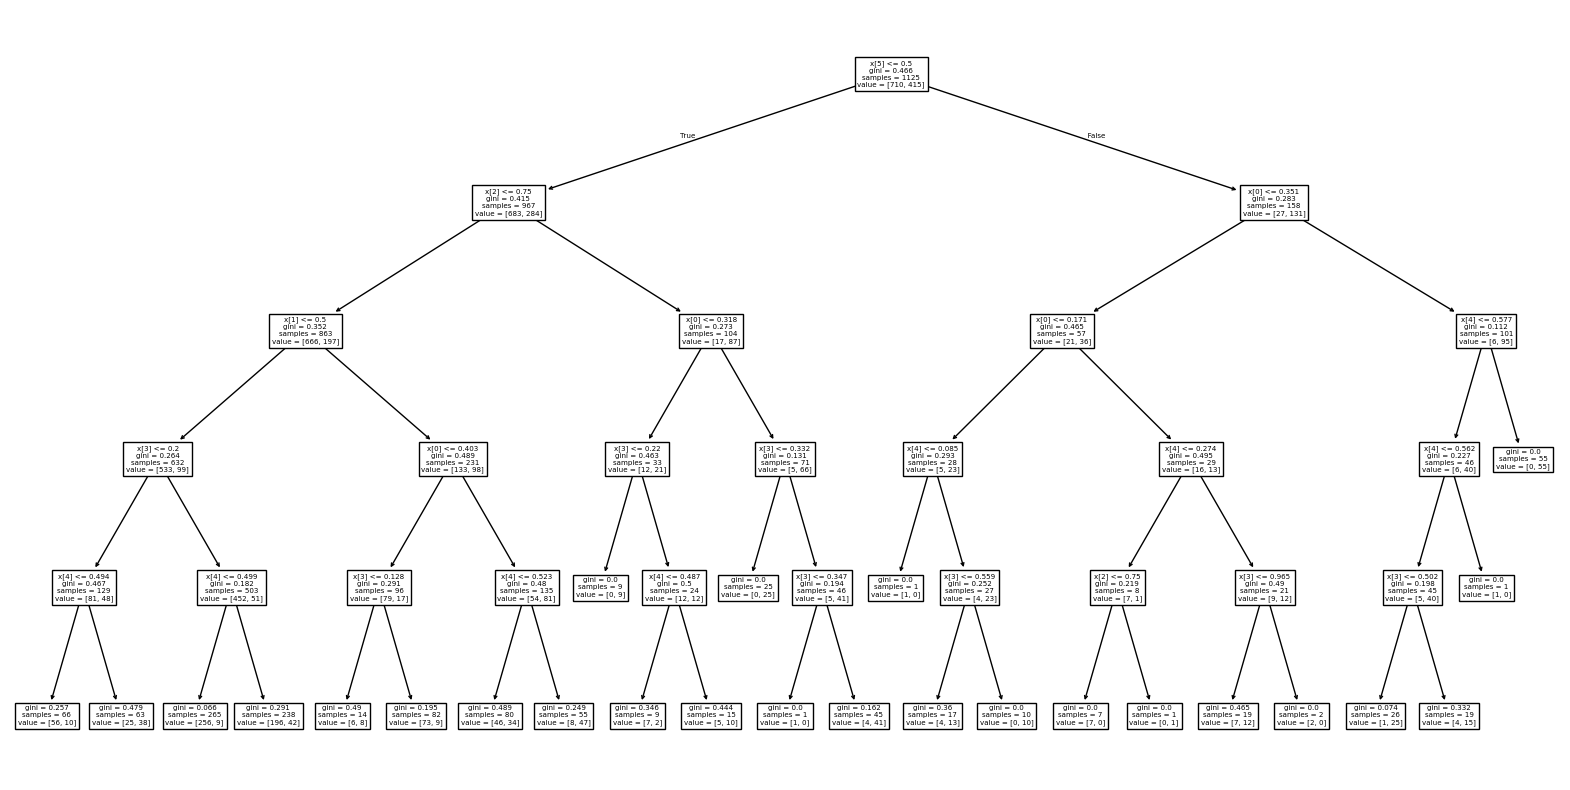

In [34]:
plt.figure(figsize=(20,10))
plot_tree(dt)
plt.show()

## Naive Bayes (Here, we utilize a Gaussian Naive Bayes Classifier)

In [35]:
gb=GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [36]:
gb.score(x_test,y_test)

0.7946666666666666

In [37]:
y_test.at[1261]

0

In [38]:
gb.predict([[0.209523,0.0,0.0,0.606246,0.339685,0.0]])

C:\Users\USER\.conda\envs\py39_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

## Random Forest

In [39]:
rf=RandomForestClassifier(n_estimators=90)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=90)

In [40]:
rf.score(x_test,y_test)

0.8266666666666667

In [41]:
y_test.at[601]

1

In [42]:
rf.predict([[0.829618,1.0,0.0,0.859410,0.252723,0.0]])

C:\Users\USER\.conda\envs\py39_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [43]:
for i in range(2,101):
    rj=RandomForestClassifier(n_estimators=i)
    rj.fit(x_train,y_train)
    print(f"i={i},Test Score: {rj.score(x_test,y_test)},Training Score: {rj.score(x_train,y_train)}")

i=2,Test Score: 0.7546666666666667,Training Score: 0.9013333333333333
i=3,Test Score: 0.792,Training Score: 0.9528888888888889
i=4,Test Score: 0.784,Training Score: 0.9555555555555556
i=5,Test Score: 0.7946666666666666,Training Score: 0.968
i=6,Test Score: 0.7893333333333333,Training Score: 0.9751111111111112
i=7,Test Score: 0.7813333333333333,Training Score: 0.9804444444444445
i=8,Test Score: 0.816,Training Score: 0.9831111111111112
i=9,Test Score: 0.8026666666666666,Training Score: 0.9875555555555555
i=10,Test Score: 0.8133333333333334,Training Score: 0.9831111111111112
i=11,Test Score: 0.8026666666666666,Training Score: 0.9911111111111112
i=12,Test Score: 0.8106666666666666,Training Score: 0.9902222222222222
i=13,Test Score: 0.7946666666666666,Training Score: 0.9946666666666667
i=14,Test Score: 0.8053333333333333,Training Score: 0.9866666666666667
i=15,Test Score: 0.7946666666666666,Training Score: 0.9911111111111112
i=16,Test Score: 0.7946666666666666,Training Score: 0.992888888888

## Voting 

In [44]:
vt_hard=VotingClassifier(estimators=[("Logistic",LogisticRegression()),("SVM",SVC()),("KNN",KNeighborsClassifier()),
                                     ("DecisionTree",DecisionTreeClassifier()),("NaiveBayes",GaussianNB()),
                                     ("RandomForest",RandomForestClassifier())],voting="hard")
vt_hard.fit(x_train,y_train)

VotingClassifier(estimators=[('Logistic', LogisticRegression()), ('SVM', SVC()),
                             ('KNN', KNeighborsClassifier()),
                             ('DecisionTree', DecisionTreeClassifier()),
                             ('NaiveBayes', GaussianNB()),
                             ('RandomForest', RandomForestClassifier())])

In [45]:
vt_hard.score(x_test,y_test)

0.8106666666666666

In [46]:
vt_soft=VotingClassifier(estimators=[("Logistic",LogisticRegression()),("SVM",SVC(probability=True)),("KNN",KNeighborsClassifier()),
                                     ("DecisionTree",DecisionTreeClassifier()),("NaiveBayes",GaussianNB()),
                                     ("RandomForest",RandomForestClassifier())],voting="soft")
vt_soft.fit(x_train,y_train)

VotingClassifier(estimators=[('Logistic', LogisticRegression()),
                             ('SVM', SVC(probability=True)),
                             ('KNN', KNeighborsClassifier()),
                             ('DecisionTree', DecisionTreeClassifier()),
                             ('NaiveBayes', GaussianNB()),
                             ('RandomForest', RandomForestClassifier())],
                 voting='soft')

In [47]:
vt_soft.score(x_test,y_test)

0.824

## Bagging

In [48]:
bg=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=50)
bg.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)

In [49]:
bg.score(x_test,y_test)

0.8

## Stacking

In [50]:
st=StackingClassifier(estimators=[("SVM",SVC()),("KNN",KNeighborsClassifier()),
                                     ("DecisionTree",DecisionTreeClassifier()),("NaiveBayes",GaussianNB()),
                                     ("RandomForest",RandomForestClassifier())])
st.fit(x_train,y_train)

StackingClassifier(estimators=[('SVM', SVC()), ('KNN', KNeighborsClassifier()),
                               ('DecisionTree', DecisionTreeClassifier()),
                               ('NaiveBayes', GaussianNB()),
                               ('RandomForest', RandomForestClassifier())])

In [51]:
st.score(x_test,y_test)

0.8213333333333334

## Displaying all model predictions in the form of a DataFrame

In [52]:
All_model_prediction=pd.DataFrame({
    "Logistic_Regression":lg.predict(x_test),"KNN":kn.predict(x_test),"SVM":sv.predict(x_test),
    "DecisionTree":dt.predict(x_test),"NaiveBayes":gb.predict(x_test),"RandomForest":rf.predict(x_test),
    "Voting_Hard":vt_hard.predict(x_test),"Voting_Soft":vt_soft.predict(x_test),
    "Bagging":bg.predict(x_test),"Stacking":st.predict(x_test)
})

In [53]:
All_model_prediction

,Logistic_Regression,KNN,SVM,DecisionTree,NaiveBayes,RandomForest,Voting_Hard,Voting_Soft,Bagging,Stacking
0,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
370,0,0,0,0,0,0,0,0,0,0
371,0,0,0,0,0,0,0,0,0,0
372,0,0,0,0,0,0,0,0,0,0
373,1,0,1,0,1,0,1,1,0,1


In [54]:
import pickle

In [55]:
pickle.dump(rf,open("cancer.pkl","wb"))